# 環境構築



*   Pythonモジュールへのパス追加





In [ ]:
!pwd

In [ ]:
# import os

# os.chdir("/mnt/MachineLearning")

In [71]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

# データ取り込み

In [1]:
# 点群データNPYファイルへのパス
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [20]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()    # 0-D Array をひとつのオブジェクトに変換
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

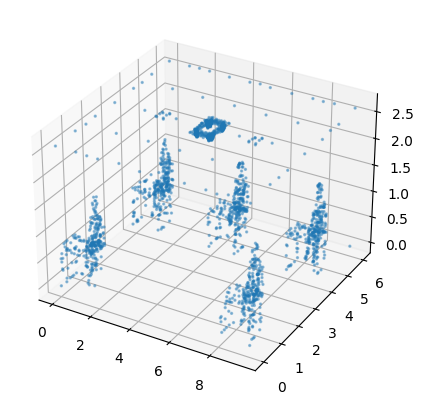

In [28]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    """
    点群データ（２次元配列）をプロット
    """
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office33'])

# Augumentation

- https://tensorflow.classcat.com/2021/12/06/keras-2-examples-vision-pointnet/
- ここではjitterとかいう処理で点群全体に一様分布乱数を加算してた（多少ノイズがあっても形状は同じだから？）
- 増強時に回転とか平行移動のようなことはやってないぽい
- あと点群シャッフルもしてた（いらんきがするけど倣ってやってみようかね）
- pointCloud_array:3d-Array(dataID, pointID, xyz)
- label_array:1d-Array(dataID)

In [29]:
rng = np.random.default_rng(0)

def augument_pointCloud(points:np.array):
    X = points + np.random.uniform(-0.01, 0.01, points.shape)
    return rng.permutation(X, axis=0)
    

In [47]:
def augumentation(augument_size:int):
    pc_list = []
    label_list = []
    for office_name, pointCloud in pointCloud_dict.items():
        print(office_name)
        label = int(office_name.replace('office', ''))
        # print(pointCloud[:5,:])
        for i in range(augument_size):
            pc = augument_pointCloud(pointCloud)
            # print(pc)
            # plot3d_points(pc)
            pc_list.append(pc)
            label_list.append(label)
            
    return np.array(pc_list), np.array(label_list)

In [60]:
pc_array, officeID_array = augumentation(4)

office1
office10
office11
office12
office13
office14
office15
office16
office17
office18
office19
office2
office20
office21
office22
office23
office24
office25
office26
office27
office28
office29
office3
office30
office31
office32
office33
office4
office5
office6
office7
office8
office9


In [61]:
pc_array.shape

(132, 2048, 3)

[[1.78165677 3.34041669 1.22943533]
 [3.05758267 1.68814091 0.74569905]
 [3.40313532 2.46620452 2.55270486]
 [1.23785715 1.16880528 1.12993047]
 [1.4324276  0.91973762 0.96697841]]


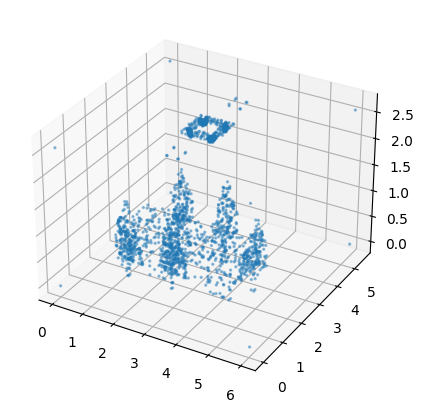

[[3.30371707 2.33774045 2.5752479 ]
 [4.47338353 2.057756   0.38053207]
 [3.82442167 2.86689688 0.3831406 ]
 [3.20988141 3.48214048 0.4652746 ]
 [2.89319809 1.15932859 0.36079931]]


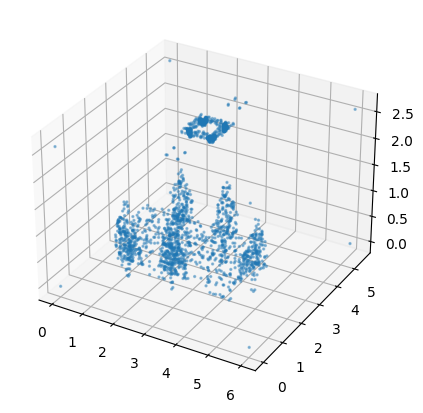

[[0.89871396 1.51834626 0.2811743 ]
 [4.86534018 2.14711856 0.47068363]
 [1.49012865 0.94056393 0.46646382]
 [1.33323004 2.43564859 0.68340112]
 [2.6169332  3.07262432 2.58967151]]


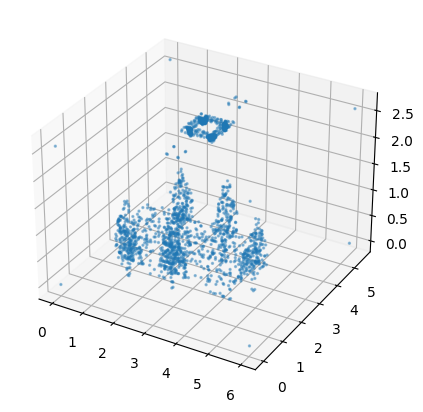

[[1.04074197 2.87622713 0.70174718]
 [1.45227057 0.96994592 0.45559677]
 [1.39839193 1.16943008 0.47739702]
 [2.97195592 1.36536885 0.59224578]
 [3.01700438 1.46897376 0.48023948]]


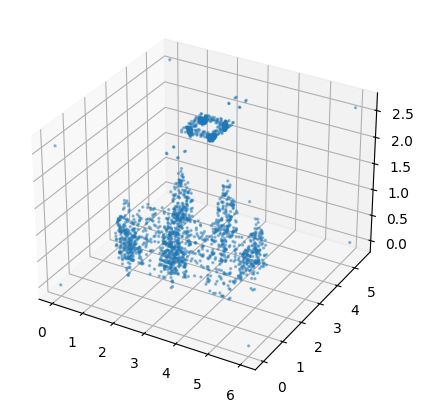

In [62]:
for pc in pc_array[:4,:]:
    print(pc[:5,:])
    plot3d_points(pc)

In [63]:
officeID_array

array([ 1,  1,  1,  1, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13,
       13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17,
       17, 17, 18, 18, 18, 18, 19, 19, 19, 19,  2,  2,  2,  2, 20, 20, 20,
       20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24,
       25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29,
       29, 29, 29,  3,  3,  3,  3, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32,
       32, 32, 33, 33, 33, 33,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,  9])

In [66]:
label_array = officeID_array - 1
label_array

array([ 0,  0,  0,  0,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
       12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
       16, 16, 17, 17, 17, 17, 18, 18, 18, 18,  1,  1,  1,  1, 19, 19, 19,
       19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23,
       24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28,
       28, 28, 28,  2,  2,  2,  2, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31,
       31, 31, 32, 32, 32, 32,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,
        5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8])

In [67]:
pc_array[[1,2,3]].shape

(3, 2048, 3)

# チューニング

In [93]:
import datetime
import optuna

# OPTUNAのコンソール出力をOFFにする
# optuna.logging.disable_default_handler()
optuna.logging.enable_default_handler()

#チューニング中のログを出力するファイル
# log_file = open('my_log_file.log', 'a')
# log_file.write(
#     '=============================================\n'
#     +f'==============={datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}==============='
#     +'\n'
# )

In [92]:
log_file.close()

In [32]:
# idealOffice_list = []

# for office in office_list:
#     df_office = df_total[df_total["office"]==office]
#     if df_office["countTimeMean_bin"].nunique() == 4:
#         idealOffice_list.append(office)
        

# office_list = idealOffice_list
# office_list

In [69]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13871663156760718659
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9472835584
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16121855019895587557
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-01-20 07:51:18.016215: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 07:51:18.504683: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9034 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [98]:
from PointNet import conv_bn, tnet, dense_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/PointNet_test_classification.db'

NUM_POINTS = pc_array.shape[1]
NUM_CLASSES = len(np.unique(label_array))

print(NUM_POINTS, NUM_CLASSES)

def model_builder(trial):
    """

    """
    
    inputs = keras.Input(shape=(NUM_POINTS, 3))

    x = tnet(inputs, 3)
    x = conv_bn(x, 32)
    x = conv_bn(x, 32)
    x = tnet(x, 32)
    x = conv_bn(x, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = keras.layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = keras.layers.Dropout(0.3)(x)
    x = dense_bn(x, 128)
    x = keras.layers.Dropout(0.3)(x)

    output = keras.layers.Dense(NUM_CLASSES, activation="softmax")(x)

    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=inputs, outputs=output, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        
        # loss='mse',
        # metrics=['mae'],
        
        loss='sparse_categorical_crossentropy',
        metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session
from sklearn.model_selection import KFold

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, X, y):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***")#, file=log_file)
    
    obj_list = []

    kf = KFold(n_splits=4, shuffle=True, random_state=42)

    for fold, (train_indices, valid_indices) in enumerate(kf.split(X)):
        X_train, X_val = X[train_indices], X[valid_indices]
        y_train, y_val = y[train_indices], y[valid_indices]
    
        model = model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [4, 8, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_train, y_train,
            validation_data = (X_val, y_val),
            epochs = 400,
            batch_size=hp_batch_size,
            # callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=40)],
            verbose=False,
        )
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        #履歴の最後の１０エポック
        # val_loss_list = history.history['val_loss'][-10:] #List of MSE
        # mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        
        val_acc_list = history.history['val_sparse_categorical_accuracy'][-10:] #List of Accuracy
        acc_min = np.min(val_acc_list) #終盤のaccのmin（振動抑制が目的）
        
        obj_list.append(acc_min)
        
        print(
            train_indices, valid_indices
            # file=log_file
        )

    #交差検証の結果の平均値を目的関数
    return np.mean(obj_list)


db_path

2048 33


'/mnt/MachineLearning/OptunaLog/PointNet_test_classification.db'

In [87]:
# """
# 最終テスト用オフィスを切り替えながらチューニング実行
# """

# for test_office in test_office_list:
#     print("test_office:", test_office)
    
#     study_name = test_office + '_is_test'
    
#     fit_office_list = [office for office in office_list if office != test_office]
#     val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
#     #============= OPTUNA Optimization with RandomSampler =======================
    
#     study = optuna.create_study(
#         sampler=optuna.samplers.RandomSampler(),
#         direction='maximize',
#         # direction='minimize',
#         study_name=study_name,
#         storage='sqlite:///'+db_path,
#         load_if_exists=True
#     )

#     study.optimize(
#         lambda trial: objective(trial, fit_office_list, val_office_list),
#         n_trials=100,
#         gc_after_trial=True
#     )
    
#     #=========================================================================
    
    
#     #============= OPTUNA Optimization with TPESampler =======================
    
#     study = optuna.create_study(
#         sampler=optuna.samplers.TPESampler(),
#         direction='maximize',
#         # direction='minimize',
#         study_name=study_name,
#         storage='sqlite:///'+db_path,
#         load_if_exists=True
#     )
    
#     study.optimize(
#         lambda trial: objective(trial, fit_office_list, val_office_list),
#         n_trials=100,
#         gc_after_trial=True
#     )
    
#     #=========================================================================


In [75]:
test_indices = [4*i for i in range(33)]
test_indices

[0,
 4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 36,
 40,
 44,
 48,
 52,
 56,
 60,
 64,
 68,
 72,
 76,
 80,
 84,
 88,
 92,
 96,
 100,
 104,
 108,
 112,
 116,
 120,
 124,
 128]

In [105]:
import random

random.seed(0)

fit_indices = [i for i in range(len(pc_array)) if i not in test_indices]
random.shuffle(fit_indices)
fit_indices

[31,
 11,
 15,
 10,
 65,
 18,
 2,
 121,
 125,
 73,
 22,
 85,
 70,
 55,
 107,
 3,
 63,
 115,
 102,
 89,
 26,
 9,
 33,
 14,
 79,
 41,
 30,
 39,
 110,
 50,
 123,
 105,
 58,
 131,
 114,
 38,
 46,
 98,
 59,
 19,
 111,
 94,
 6,
 27,
 21,
 29,
 42,
 101,
 77,
 90,
 97,
 67,
 93,
 34,
 129,
 62,
 127,
 1,
 95,
 47,
 78,
 122,
 5,
 126,
 75,
 119,
 35,
 54,
 74,
 118,
 117,
 81,
 57,
 13,
 109,
 53,
 25,
 103,
 91,
 43,
 106,
 17,
 113,
 49,
 23,
 86,
 37,
 99,
 61,
 82,
 51,
 69,
 83,
 87,
 45,
 7,
 71,
 130,
 66]

In [106]:
X_fit, X_test = pc_array[fit_indices], pc_array[test_indices]
y_fit, y_test = label_array[fit_indices], label_array[test_indices]

In [107]:
X_fit.shape

(99, 2048, 3)

In [108]:
X_test.shape

(33, 2048, 3)

In [109]:
y_fit.shape

(99,)

In [110]:
y_test.shape

(33,)

In [111]:
"""
チューニング実行
"""

study_name = 'test'

study = optuna.create_study(
    sampler=optuna.samplers.RandomSampler(),
    # sampler=optuna.samplers.TPESampler(),
    direction='maximize',
    # direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

study.optimize(
    lambda trial: objective(trial, X_fit, y_fit),
    n_trials=100,
    gc_after_trial=True
)


study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    sampler=optuna.samplers.TPESampler(),
    direction='maximize',
    # direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

study.optimize(
    lambda trial: objective(trial, X_fit, y_fit),
    n_trials=100,
    gc_after_trial=True
)


[I 2023-01-20 08:19:06,471] A new study created in RDB with name: test


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 08:20:27,227] Trial 0 finished with value: 0.0 and parameters: {'lr': 0.001041882092505809, 'batch_size': 4}. Best is trial 0 with value: 0.0.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:22:33,201] Trial 1 finished with value: 0.22541667148470879 and parameters: {'lr': 0.0015523409946066975, 'batch_size': 32}. Best is trial 1 with value: 0.22541667148470879.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:24:14,401] Trial 2 finished with value: 0.5575000047683716 and parameters: {'lr': 0.013245599835824877, 'batch_size': 128}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:26:12,138] Trial 3 finished with value: 0.39333333633840084 and parameters: {'lr': 0.0061821372214138125, 'batch_size': 128}. Best is trial 2 with value: 0.5575000047683716.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 08:27:27,104] Trial 4 finished with value: 0.0 and parameters: {'lr': 0.0009600150800822484, 'batch_size': 8}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:29:21,506] Trial 5 finished with value: 0.4754166752099991 and parameters: {'lr': 0.0005280250577218758, 'batch_size': 32}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:30:22,914] Trial 6 finished with value: 0.02083333395421505 and parameters: {'lr': 0.022800303970394162, 'batch_size': 16}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:32:02,928] Trial 7 finished with value: 0.3124999962747097 and parameters: {'lr': 4.6646710133966855e-05, 'batch_size': 64}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:33:14,977] Trial 8 finished with value: 0.0 and parameters: {'lr': 0.02775005388709156, 'batch_size': 8}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:35:09,068] Trial 9 finished with value: 0.4320833273231983 and parameters: {'lr': 2.2004341205036574e-05, 'batch_size': 16}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:36:19,074] Trial 10 finished with value: 0.0 and parameters: {'lr': 0.0008248307515799644, 'batch_size': 4}. Best is trial 2 with value: 0.5575000047683716.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:37:19,017] Trial 11 finished with value: 0.9087499976158142 and parameters: {'lr': 6.475866972349563e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:38:22,681] Trial 12 finished with value: 0.0 and parameters: {'lr': 0.008567527470664919, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:40:23,531] Trial 13 finished with value: 0.4558333307504654 and parameters: {'lr': 0.000653892170511747, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:41:30,426] Trial 14 finished with value: 0.0 and parameters: {'lr': 0.07869444476853589, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 08:42:41,373] Trial 15 finished with value: 0.009999999776482582 and parameters: {'lr': 0.016316618029393166, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:44:17,148] Trial 16 finished with value: 0.4858333319425583 and parameters: {'lr': 4.300132021169978e-05, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:46:00,715] Trial 17 finished with value: 0.6575000137090683 and parameters: {'lr': 0.00024010775065873364, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:47:20,614] Trial 18 finished with value: 0.5170833244919777 and parameters: {'lr': 9.153679949667737e-05, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:48:52,131] Trial 19 finished with value: 0.0 and parameters: {'lr': 0.00023253526334244282, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:50:28,706] Trial 20 finished with value: 0.4058333244174719 and parameters: {'lr': 4.2628012563174573e-05, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:51:35,431] Trial 21 finished with value: 0.009999999776482582 and parameters: {'lr': 0.07013472767162401, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:52:44,790] Trial 22 finished with value: 0.010416666977107525 and parameters: {'lr': 0.004453095752814188, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:54:31,808] Trial 23 finished with value: 0.3229166604578495 and parameters: {'lr': 1.3799022060282135e-05, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:55:44,575] Trial 24 finished with value: 0.0 and parameters: {'lr': 0.06170070672385718, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:56:59,758] Trial 25 finished with value: 0.0 and parameters: {'lr': 0.001402983131661302, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:57:58,184] Trial 26 finished with value: 0.0 and parameters: {'lr': 9.052613865733773e-05, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 08:59:39,059] Trial 27 finished with value: 0.3945833295583725 and parameters: {'lr': 3.0077851101323933e-05, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:01:09,469] Trial 28 finished with value: 0.4024999961256981 and parameters: {'lr': 8.438056432743353e-05, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:02:17,711] Trial 29 finished with value: 0.0 and parameters: {'lr': 0.005287228124587135, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:03:30,986] Trial 30 finished with value: 0.0 and parameters: {'lr': 1.3708210131743807e-05, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:04:26,812] Trial 31 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00018226056026331952, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:05:48,764] Trial 32 finished with value: 0.0 and parameters: {'lr': 0.00016036966166685905, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:07:38,037] Trial 33 finished with value: 0.2841666638851166 and parameters: {'lr': 3.404509775078134e-05, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:08:52,046] Trial 34 finished with value: 0.0 and parameters: {'lr': 0.009162959459982441, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:10:58,073] Trial 35 finished with value: 0.3149999976158142 and parameters: {'lr': 0.00028753961069834716, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:12:05,490] Trial 36 finished with value: 0.8987500071525574 and parameters: {'lr': 0.0016304220935374272, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:13:50,899] Trial 37 finished with value: 0.6558333337306976 and parameters: {'lr': 0.01690836662031979, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:15:04,149] Trial 38 finished with value: 0.0 and parameters: {'lr': 0.009803010353865245, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:16:44,917] Trial 39 finished with value: 0.0 and parameters: {'lr': 0.003549135996184193, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:17:57,858] Trial 40 finished with value: 0.0 and parameters: {'lr': 0.0014606973380361008, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:19:14,868] Trial 41 finished with value: 0.0 and parameters: {'lr': 0.005483549263499846, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:20:29,918] Trial 42 finished with value: 0.0 and parameters: {'lr': 0.0005422792658324862, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:22:03,719] Trial 43 finished with value: 0.0 and parameters: {'lr': 0.010403460741101704, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:23:47,495] Trial 44 finished with value: 0.20208333060145378 and parameters: {'lr': 0.0013284681565296078, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:24:59,729] Trial 45 finished with value: 0.0 and parameters: {'lr': 3.41283698589211e-05, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:26:16,996] Trial 46 finished with value: 0.0 and parameters: {'lr': 0.0036064395043652006, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:28:26,015] Trial 47 finished with value: 0.32499999552965164 and parameters: {'lr': 0.0015087411696068508, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:29:36,964] Trial 48 finished with value: 0.0 and parameters: {'lr': 0.05983872249455352, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:31:14,249] Trial 49 finished with value: 0.5858333334326744 and parameters: {'lr': 0.00024884584025295953, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:32:51,783] Trial 50 finished with value: 0.6249999925494194 and parameters: {'lr': 0.020122961199919652, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:34:46,199] Trial 51 finished with value: 0.4024999961256981 and parameters: {'lr': 0.012592273100214008, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:36:26,717] Trial 52 finished with value: 0.5054166745394468 and parameters: {'lr': 0.0002545238248029486, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:37:42,617] Trial 53 finished with value: 0.0 and parameters: {'lr': 0.05448601061712365, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:39:19,138] Trial 54 finished with value: 0.3237499985843897 and parameters: {'lr': 0.008416995297606955, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:41:03,076] Trial 55 finished with value: 0.30124999582767487 and parameters: {'lr': 0.00011288611959594608, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:42:27,136] Trial 56 finished with value: 0.0 and parameters: {'lr': 0.05300756786072049, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:44:11,201] Trial 57 finished with value: 0.6145833358168602 and parameters: {'lr': 0.01450568102942431, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:45:55,429] Trial 58 finished with value: 0.3141666650772095 and parameters: {'lr': 0.0007204986162690437, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:47:05,106] Trial 59 finished with value: 0.009999999776482582 and parameters: {'lr': 0.009235428314805135, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:48:28,191] Trial 60 finished with value: 0.0 and parameters: {'lr': 1.4960991673010757e-05, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:50:44,329] Trial 61 finished with value: 0.3245833348482847 and parameters: {'lr': 0.0014908859058869895, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:52:20,055] Trial 62 finished with value: 0.33166666328907013 and parameters: {'lr': 4.8514562717440905e-05, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:54:37,391] Trial 63 finished with value: 0.5354166701436043 and parameters: {'lr': 0.041659035517648345, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:56:15,668] Trial 64 finished with value: 0.0 and parameters: {'lr': 0.0011574609929076538, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 09:58:21,181] Trial 65 finished with value: 0.3637499902397394 and parameters: {'lr': 0.010355658257038583, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 09:59:51,063] Trial 66 finished with value: 0.09083333238959312 and parameters: {'lr': 0.0017690775245939037, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:01:41,807] Trial 67 finished with value: 0.40458333119750023 and parameters: {'lr': 4.95964603471956e-05, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:03:26,537] Trial 68 finished with value: 0.4845833256840706 and parameters: {'lr': 5.011532220317299e-05, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 10:05:04,610] Trial 69 finished with value: 0.45499999076128006 and parameters: {'lr': 0.045891960638118165, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:06:14,561] Trial 70 finished with value: 0.0 and parameters: {'lr': 0.024808418322137614, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:07:31,295] Trial 71 finished with value: 0.019999999552965164 and parameters: {'lr': 0.012250438883774828, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:08:37,934] Trial 72 finished with value: 0.0 and parameters: {'lr': 8.185778746925709e-05, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 10:09:51,523] Trial 73 finished with value: 0.0 and parameters: {'lr': 0.0016628125111799834, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:11:37,607] Trial 74 finished with value: 0.5150000005960464 and parameters: {'lr': 0.0001957997674204061, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:12:36,543] Trial 75 finished with value: 0.0 and parameters: {'lr': 5.355478644963434e-05, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:14:16,050] Trial 76 finished with value: 0.08041666727513075 and parameters: {'lr': 0.0019169985098010254, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:15:24,051] Trial 77 finished with value: 0.009999999776482582 and parameters: {'lr': 0.01673621974931754, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:17:00,394] Trial 78 finished with value: 0.6445833370089531 and parameters: {'lr': 0.00014191785189917602, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:18:14,545] Trial 79 finished with value: 0.0 and parameters: {'lr': 0.003827628072375668, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:19:36,746] Trial 80 finished with value: 0.0 and parameters: {'lr': 0.002607428953182764, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:21:31,030] Trial 81 finished with value: 0.6475000008940697 and parameters: {'lr': 0.03119690414269255, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:23:19,448] Trial 82 finished with value: 0.6454166769981384 and parameters: {'lr': 0.0747285408009242, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:25:01,375] Trial 83 finished with value: 0.3241666667163372 and parameters: {'lr': 2.4328408752422305e-05, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:26:15,084] Trial 84 finished with value: 0.0 and parameters: {'lr': 0.02354610799504074, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:27:24,134] Trial 85 finished with value: 0.0 and parameters: {'lr': 0.0021666049645758176, 'batch_size': 8}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:28:28,535] Trial 86 finished with value: 0.9087499976158142 and parameters: {'lr': 4.880118750239773e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:30:05,662] Trial 87 finished with value: 0.0 and parameters: {'lr': 0.0023448599223464188, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:31:39,246] Trial 88 finished with value: 0.0 and parameters: {'lr': 0.0002701629598390905, 'batch_size': 4}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:32:46,413] Trial 89 finished with value: 0.9087499976158142 and parameters: {'lr': 5.2652362048531864e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:34:22,423] Trial 90 finished with value: 0.4024999961256981 and parameters: {'lr': 4.0886388780918315e-05, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:36:20,891] Trial 91 finished with value: 0.5258333422243595 and parameters: {'lr': 0.0001027060337559016, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:37:28,892] Trial 92 finished with value: 0.0 and parameters: {'lr': 0.0868699152000116, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:38:49,685] Trial 93 finished with value: 0.9087499976158142 and parameters: {'lr': 1.6358584828451927e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:40:35,378] Trial 94 finished with value: 0.33250000327825546 and parameters: {'lr': 3.584435143038393e-05, 'batch_size': 32}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:41:33,522] Trial 95 finished with value: 0.9087499976158142 and parameters: {'lr': 6.50722065679255e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:43:26,921] Trial 96 finished with value: 0.5650000050663948 and parameters: {'lr': 2.6508381912225068e-05, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:45:13,331] Trial 97 finished with value: 0.5466666743159294 and parameters: {'lr': 0.035464794976681965, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:46:20,774] Trial 98 finished with value: 0.009999999776482582 and parameters: {'lr': 0.03479512398196026, 'batch_size': 64}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:48:23,311] Trial 99 finished with value: 0.6674999892711639 and parameters: {'lr': 4.9246385646351715e-05, 'batch_size': 16}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]


[I 2023-01-20 10:48:23,984] Using an existing study with name 'test' instead of creating a new one.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 10:49:26,441] Trial 100 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00038317651571543514, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:50:37,819] Trial 101 finished with value: 0.9087499976158142 and parameters: {'lr': 6.970869135458886e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 10:51:38,952] Trial 102 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00040044843515563166, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:52:38,646] Trial 103 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0003837242365427293, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:53:35,897] Trial 104 finished with value: 0.9087499976158142 and parameters: {'lr': 0.000409013125708766, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:54:34,152] Trial 105 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00039571569019943107, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 10:55:37,590] Trial 106 finished with value: 0.9087499976158142 and parameters: {'lr': 7.014371447397733e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:56:38,401] Trial 107 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00037219857097586817, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:57:41,911] Trial 108 finished with value: 0.9087499976158142 and parameters: {'lr': 6.403582015415311e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:58:39,154] Trial 109 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00016951015213907618, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 10:59:49,515] Trial 110 finished with value: 0.9087499976158142 and parameters: {'lr': 0.000377975664366891, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 11:00:47,423] Trial 111 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00015081374151710132, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:01:59,422] Trial 112 finished with value: 0.9087499976158142 and parameters: {'lr': 1.833652322218917e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:03:32,125] Trial 113 finished with value: 0.8679166734218597 and parameters: {'lr': 1.015740419473639e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:04:34,395] Trial 114 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006678860096197106, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:05:36,854] Trial 115 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0009519963527881621, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:06:40,497] Trial 116 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0008716570090513164, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:07:42,906] Trial 117 finished with value: 0.8987499922513962 and parameters: {'lr': 0.0009307299216944409, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:08:42,557] Trial 118 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00045895618497101675, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:09:41,367] Trial 119 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0004979995726181387, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:10:42,110] Trial 120 finished with value: 0.9087499976158142 and parameters: {'lr': 0.000321322612601244, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:11:39,461] Trial 121 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0003379383061862145, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:12:40,836] Trial 122 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0003722262685943382, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:13:38,479] Trial 123 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0004234982632391785, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:14:36,322] Trial 124 finished with value: 0.9087499976158142 and parameters: {'lr': 7.244579075881637e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:15:35,723] Trial 125 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00012724170212564668, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:16:32,058] Trial 126 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00014707687663978813, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:17:29,692] Trial 127 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00019930079599775907, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:18:25,168] Trial 128 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00019203207069997625, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:19:22,919] Trial 129 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00019594494232412358, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:20:22,995] Trial 130 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006079196709281678, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:21:24,420] Trial 131 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006458134072456716, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:22:36,142] Trial 132 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0005920790859182563, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:23:41,858] Trial 133 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0008810384532735617, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:24:44,556] Trial 134 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0007576539566777275, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:25:43,622] Trial 135 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0007159537741244885, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:26:49,271] Trial 136 finished with value: 0.9087499976158142 and parameters: {'lr': 0.001180671222350047, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:27:48,597] Trial 137 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00029240968833202163, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:29:02,587] Trial 138 finished with value: 0.8987500071525574 and parameters: {'lr': 0.0011958443264387974, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:30:03,153] Trial 139 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0005024711624000349, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:31:03,004] Trial 140 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0004603565449497559, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:32:02,545] Trial 141 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00047336927777822784, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:33:03,587] Trial 142 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0004898869654783096, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:34:04,079] Trial 143 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0003137445303471401, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:35:00,754] Trial 144 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00017485246486294696, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:36:00,171] Trial 145 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00012281403294033414, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:36:56,463] Trial 146 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0001243908840246207, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:37:56,762] Trial 147 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00011958273284874067, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:38:53,239] Trial 148 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00023132134055048987, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:39:52,381] Trial 149 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0002280489085083265, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:40:50,655] Trial 150 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00034069047945330474, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:41:52,106] Trial 151 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006192960117429072, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:42:54,090] Trial 152 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006106705188863283, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:43:51,240] Trial 153 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00018932659396313133, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:44:47,366] Trial 154 finished with value: 0.9087499976158142 and parameters: {'lr': 0.000561409392189229, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:45:46,476] Trial 155 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00030317465738470783, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:46:45,167] Trial 156 finished with value: 0.9087499976158142 and parameters: {'lr': 0.000575084138611317, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:47:49,593] Trial 157 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0010064531565020167, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:48:53,827] Trial 158 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0009831207633029236, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:49:57,835] Trial 159 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0007782938686298513, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:50:56,380] Trial 160 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0007492738424188758, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 42 44 45 47 49 51 52 53 55 59 60 62 63
 64 65 68 69 70 71 72 73 74 75 76 80 81 82 83 84 86 87 88 89 90 92 93 94
 95 97] [ 3  6  8 17 36 38 41 43 46 48 50 54 56 57 58 61 66 67 77 78 79 85 91 96
 98]


[I 2023-01-20 11:51:56,071] Trial 161 finished with value: 0.9087499976158142 and parameters: {'lr': 8.57402245669979e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:52:56,280] Trial 162 finished with value: 0.9087499976158142 and parameters: {'lr': 9.060780199808405e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:53:52,272] Trial 163 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00023402798103750963, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:54:50,289] Trial 164 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00020428579476660625, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:55:47,899] Trial 165 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0001925727596833771, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:56:46,493] Trial 166 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00015034016606715615, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:57:44,186] Trial 167 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00013700854397703124, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:58:40,022] Trial 168 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00010238250268467313, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 11:59:42,683] Trial 169 finished with value: 0.9087499976158142 and parameters: {'lr': 5.9042271582462074e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:00:44,776] Trial 170 finished with value: 0.9087499976158142 and parameters: {'lr': 6.258877939932566e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:01:47,078] Trial 171 finished with value: 0.9087499976158142 and parameters: {'lr': 6.184769716965396e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:03:05,378] Trial 172 finished with value: 0.9087499976158142 and parameters: {'lr': 4.183744564334485e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:04:04,023] Trial 173 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00046828955600966115, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:05:02,199] Trial 174 finished with value: 0.9087499976158142 and parameters: {'lr': 0.000287244776144868, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:06:02,517] Trial 175 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0004064825980536809, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:07:00,710] Trial 176 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00046703704903298807, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:08:06,802] Trial 177 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0005669414182495186, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:09:04,604] Trial 178 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0003939080441379334, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:10:04,747] Trial 179 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006933389035146814, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:11:07,649] Trial 180 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0008062563650080139, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:12:14,307] Trial 181 finished with value: 0.8887500017881393 and parameters: {'lr': 0.0011471226209302497, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:13:11,451] Trial 182 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00012105364913228167, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:14:12,260] Trial 183 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00026572964475286577, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:15:14,761] Trial 184 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006953470868641926, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:16:16,454] Trial 185 finished with value: 0.9087499976158142 and parameters: {'lr': 7.250646357925426e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:17:27,771] Trial 186 finished with value: 0.9087499976158142 and parameters: {'lr': 2.1218550409486847e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:18:34,830] Trial 187 finished with value: 0.8774999976158142 and parameters: {'lr': 0.0013232645498173507, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:19:34,249] Trial 188 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0005206813226041762, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:20:37,991] Trial 189 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0008641231940053144, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:21:46,950] Trial 190 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0007925015531173209, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:22:46,852] Trial 191 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0006001213203611226, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:23:47,262] Trial 192 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0004843757902142196, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:24:45,395] Trial 193 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00030226599953259625, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:25:41,113] Trial 194 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00017173202030766057, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:26:41,889] Trial 195 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0001858917093379698, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:27:40,824] Trial 196 finished with value: 0.9087499976158142 and parameters: {'lr': 0.00016861852559012447, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:28:43,683] Trial 197 finished with value: 0.8887500017881393 and parameters: {'lr': 0.00039294257770526933, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:30:03,580] Trial 198 finished with value: 0.9087499976158142 and parameters: {'lr': 1.7966572825206963e-05, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]
*** clear_session() occured ! ***
[ 1  2  3  5  6  7  8  9 11 13 14 16 17 19 20 21 23 24 25 27 28 29 30 32
 33 34 35 36 37 38 41 43 45 46 48 50 51 52 53 54 55 56 57 58 59 60 61 63
 65 66 67 69 71 72 74 75 77 78 79 80 81 82 83 85 86 87 89 90 91 92 93 94
 96 98] [ 0  4 10 12 15 18 22 26 31 39 40 42 44 47 49 62 64 68 70 73 76 84 88 95
 97]
[ 0  1  2  3  4  6  8 10 12 14 15 17 18 20 21 22 23 26 29 31 32 36 37 38
 39 40 41 42 43 44 46 47 48 49 50 51 52 54 56 57 58 59 60 61 62 63 64 66
 67 68 70 71 73 74 75 76 77 78 79 82 83 84 85 86 87 88 90 91 92 93 95 96
 97 98] [ 5  7  9 11 13 16 19 24 25 27 28 30 33 34 35 45 53 55 65 69 72 80 81 89
 94]
[ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19 20 

[I 2023-01-20 12:31:01,613] Trial 199 finished with value: 0.9087499976158142 and parameters: {'lr': 0.0002387851865079505, 'batch_size': 128}. Best is trial 11 with value: 0.9087499976158142.


[ 0  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 22 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58
 61 62 64 65 66 67 68 69 70 72 73 76 77 78 79 80 81 84 85 88 89 91 94 95
 96 97 98] [ 1  2 14 20 21 23 29 32 37 51 52 59 60 63 71 74 75 82 83 86 87 90 92 93]


# チューニング結果確認

In [123]:
import pandas as pd

def plot_history(history:dict, ymax:float=None, fname:str=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss (categorical_crossentropy)")
    
    if ymax is not None:
        plt.ylim(0., ymax)
        
    if fname is not None:
        plt.savefig(fname.replace(".", "_loss."))
        
    plt.show()
    
    #=====================================================

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    if fname is not None:
        plt.savefig(fname.replace(".", "_acc."))
    plt.show()

## チューニングの再現

In [ ]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    fit_office_list = [office for office in office_list if office != test_office]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]

    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_onlyFloating", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_onlyFloating", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 400,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=40),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


In [ ]:
tb_log_dir

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard  --logdir $tb_log_dir

In [ ]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [ ]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_onlyFloating", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_onlyFloating", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 400,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


In [ ]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

# 特定のオフィスに対して最終テストおよびその他考察

In [117]:
# test_office="office1"

study_name = 'test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

  Value: 0.9087499976158142
  Params: 
    batch_size: 128
    lr: 6.475866972349563e-05


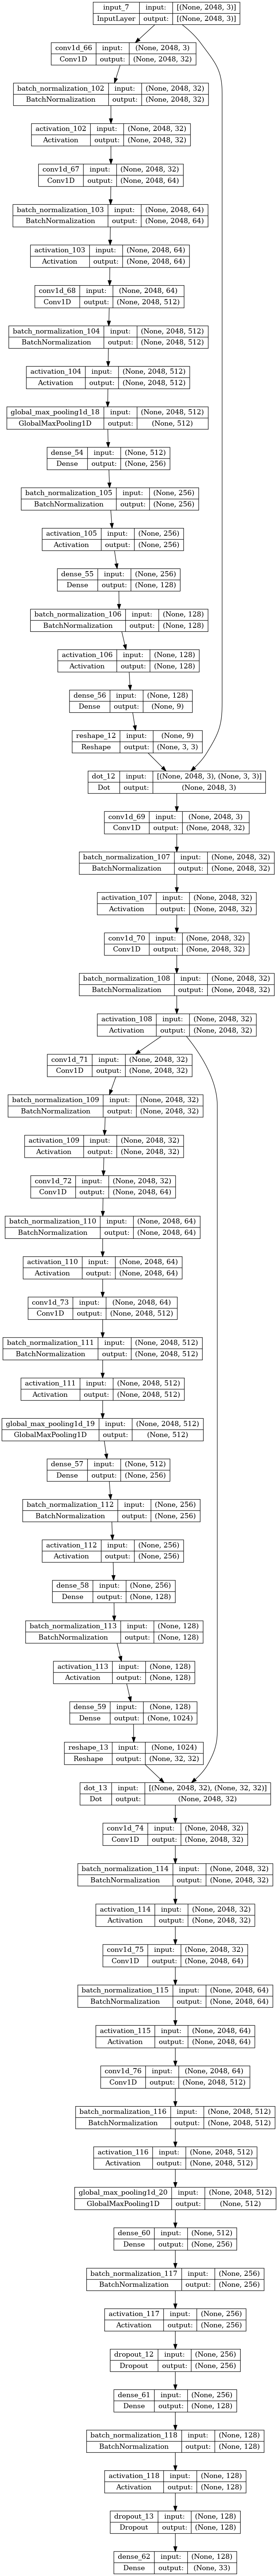

In [118]:
best_model = model_builder(best_trial)

keras.utils.plot_model(best_model, show_shapes=True)

In [136]:
best_model = model_builder(best_trial)

test_history = best_model.fit(
    X_fit, y_fit,
    validation_data = (X_test, y_test),
    epochs = 400,
    # batch_size=loaded_study.best_params["batch_size"],
    batch_size=64,
    # callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
    callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=40)],
    # verbose=False,
)



Epoch 1/400
2/2 [==============================] - 5s 718ms/step - loss: 7.4336 - sparse_categorical_accuracy: 0.0505 - val_loss: 5.3779 - val_sparse_categorical_accuracy: 0.1515
Epoch 2/400
2/2 [==============================] - 0s 87ms/step - loss: 7.0503 - sparse_categorical_accuracy: 0.0505 - val_loss: 5.0365 - val_sparse_categorical_accuracy: 0.2121
Epoch 3/400
2/2 [==============================] - 0s 131ms/step - loss: 6.7562 - sparse_categorical_accuracy: 0.1010 - val_loss: 4.8596 - val_sparse_categorical_accuracy: 0.2424
Epoch 4/400
2/2 [==============================] - 0s 90ms/step - loss: 6.5118 - sparse_categorical_accuracy: 0.2121 - val_loss: 4.8475 - val_sparse_categorical_accuracy: 0.2727
Epoch 5/400
2/2 [==============================] - 0s 91ms/step - loss: 6.3837 - sparse_categorical_accuracy: 0.1919 - val_loss: 4.6125 - val_sparse_categorical_accuracy: 0.3636
Epoch 6/400
2/2 [==============================] - 0s 87ms/step - loss: 6.2853 - sparse_categorical_accuracy

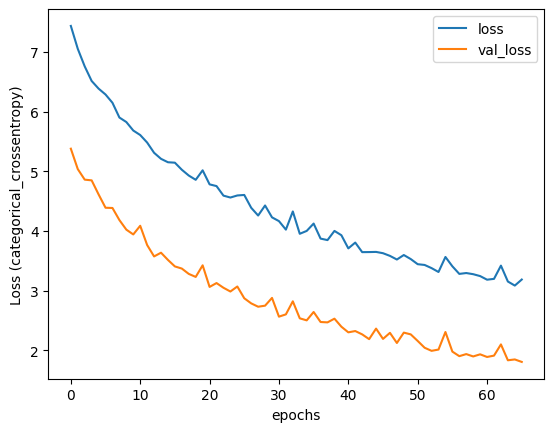

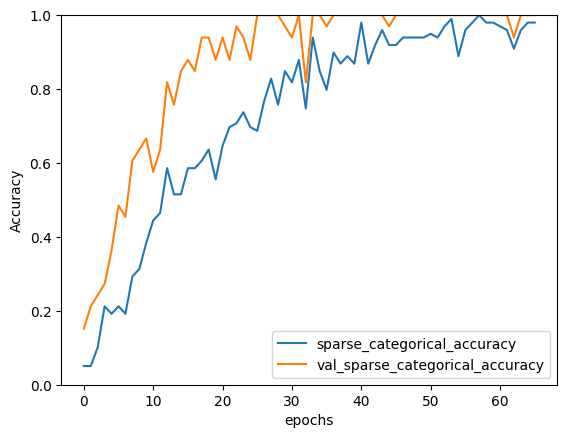

In [137]:
plot_history(test_history.history)

In [138]:
y_fit_pred_softmax = best_model.predict(X_fit)
y_test_pred_softmax = best_model.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [139]:
y_fit_pred = y_fit_pred_softmax.argmax(axis=1)
y_test_pred = y_test_pred_softmax.argmax(axis=1)

In [140]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

,correct,predict,match
0,0,0,True
1,9,9,True
2,10,10,True
3,11,11,True
4,12,12,True
5,13,13,True
6,14,14,True
7,15,15,True
8,16,16,True
9,17,17,True


In [141]:
from sklearn.metrics import accuracy_score

print("train_acc: ", accuracy_score(y_fit, y_fit_pred))
print("test_acc: ", accuracy_score(y_test, y_test_pred))

train_acc:  1.0
test_acc:  1.0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_fit, y_fit_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Reds')

In [ ]:
y_fit.to_numpy().shape

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [ ]:
X_dict_fit

In [ ]:
df_total

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def plot_RoI_level(df_total:pd.DataFrame):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = df_total["office"].unique()
    classification_level = df_total["countTimeMean_bin"].nunique()
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

In [ ]:
plot_RoI_level(df_total)

In [ ]:
import gc
 
gc.collect()

In [ ]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()